In [1]:
import tensorflow as tf

# Linear Regression

The very known equation of a simple linear model is

$$Y = a X + b $$

Where Y is the dependent variable and X is the independent variable, and **a** and **b** being the parameters we adjust. 

**a** is known as "slope" or "gradient" and **b** as "intercept".

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,6)

### Let's take an example

Let's define an independent variable:

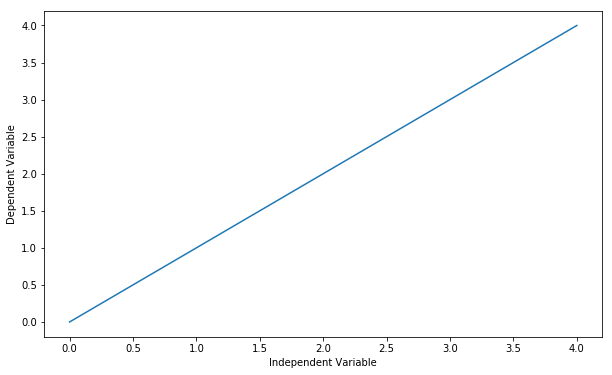

In [3]:
X = np.arange(0.0,5.0,1.0)

a = 1
b = 0

Y = a*X + b

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

**A simple example of a linear function can help us understand the basic mechanism behind TensorFlow

For the first par we will generate random data points and define a linear relation, we'll use TensorFlow to adjust and get the right parameters.

In [4]:
X_data = np.random.rand(100).astype(np.float32)
print('Sample from X_data: %s' % X_data[0:5])

Sample from X_data: [ 0.88063675  0.62321651  0.13854299  0.20657083  0.27131119]


The equation for the model used in this example is:

$$Y = 7 X + 7 $$

Just as example, we choose that as our "generation" function because we liked it

In [5]:
y_data = X_data * 7 + 7
print('Sample from X_data: %s' % y_data[0:5])

Sample from X_data: [ 13.16445732  11.36251545   7.96980095   8.44599533   8.8991785 ]


In [6]:
vectorizer = lambda y: y + np.random.normal(loc=0.0,scale=0.1)

'''
Define a vectorized function which takes a nested sequence of objects or
numpy arrays as inputs and returns an single or tuple of numpy array as
output.
'''
y_data = np.vectorize(vectorizer)(y_data) 
print('Sample from y_dat: %s' % y_data[0:5])

#Summary: Take the data originated with the 'real' function and 'change' it a little

Sample from y_dat: [ 13.09229014  11.30081227   7.9406763    8.35421045   8.80858822]


Here is a sample of data:

In [7]:
list(zip(X_data,y_data))[0:5]

[(0.88063675, 13.092290139420436),
 (0.62321651, 11.300812271364386),
 (0.13854299, 7.9406762963278421),
 (0.20657083, 8.3542104546447682),
 (0.27131119, 8.8085882238414914)]

First, we initialize the variables "a" and "b" with some random guesses and define the 'objective' linear function

In [8]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)

y_pred = a * X_data + b

In a linear regression, we minimized the squared error of the equation that we want to adjust minus the target values, so we define de equation to be minimized as **loss**

To find loss's value, tf.reduce_mean() is used. This function finds the mean of a multidimensional tensor, and the result can have a diferent dimension.

In [9]:
loss = tf.reduce_mean(tf.square(y_pred - y_data))

Then we define the optimizer method. Here we will use a simple gradient descent with learning rate of 0.5

Now we will define the training method of our graph. 

We will use the tf.train.GradientDescentOptimizer.minimize() 

In [10]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

Now we are ready to start the optimization and run the graph

In [11]:
numSteps = 100
train_data = []
evals = None

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for step in range(numSteps):
        evals = sess.run(fetches=[train,a,b]) #fetches is a list, so the returned values 'evals' is also a list
        
        if (step > 0 and step % 10== 0):
            print('At step %d:' %step)
            print('a %.2f:' %evals[1])
            print('b %.2f:\n' %evals[2])
            
        if(step % 10 == 0): #Almacenamos como ha ido yendo la cosa cada x pasos para plotear despues
            train_data.append(evals) 


At step 10:
a 6.26:
b 7.42:

At step 20:
a 6.65:
b 7.20:

At step 30:
a 6.84:
b 7.10:

At step 40:
a 6.94:
b 7.04:

At step 50:
a 6.98:
b 7.02:

At step 60:
a 7.00:
b 7.01:

At step 70:
a 7.01:
b 7.00:

At step 80:
a 7.02:
b 7.00:

At step 90:
a 7.02:
b 7.00:



Plot the data

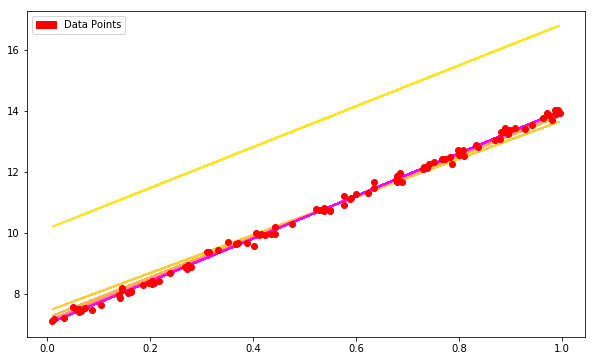

In [12]:
converter = plt.colors
cr,cg,cb = (1.0, 1.0, 0.0)

for f in train_data: #Iterate over the steps
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if(cb > 1.0): cb = 1.0
    if(cg < 0.0): cg = 0.0
        
    [_,a,b] = f
    f_y = np.vectorize(lambda x: a*x + b)(X_data)
    line = plt.plot(X_data,f_y)
    plt.setp(line,color=(cr,cg,cb))
    
plt.plot(X_data,y_data,'ro')

green_line = mpatches.Patch(color='red',label='Data Points')

plt.legend(handles=[green_line])

plt.show()